In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras

In [14]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [16]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [17]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [18]:
df['cap-color'].value_counts()

cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [21]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [22]:
X = df.drop(columns='class')
y = df['class']

In [23]:
X.head(3)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3


In [24]:
y.head(3)

0    1
1    0
2    0
Name: class, dtype: int32

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X , y, test_size=0.25, shuffle=True, random_state=69)

In [26]:
x_train.shape

(6093, 22)

In [27]:
print(y_train[:5])

y_train = keras.utils.to_categorical(y_train, num_classes=2)

print(y_train[:5])

7551    1
6671    1
2346    0
1115    0
4179    0
Name: class, dtype: int32
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [29]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation='softmax'))

c:\Users\malak\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,914 (11.38 KB)

 Trainable params: 2,914 (11.38 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.fit(x_train, y_train, batch_size=500, epochs=100, validation_split=0.2, verbose=2)

Epoch 1/100
10/10 - 4s - 381ms/step - accuracy: 0.5423 - loss: 1.0224 - val_accuracy: 0.7473 - val_loss: 0.5987
Epoch 2/100
10/10 - 0s - 18ms/step - accuracy: 0.6005 - loss: 0.7624 - val_accuracy: 0.7580 - val_loss: 0.5543
Epoch 3/100
10/10 - 0s - 14ms/step - accuracy: 0.6313 - loss: 0.6630 - val_accuracy: 0.8015 - val_loss: 0.5062
Epoch 4/100
10/10 - 0s - 14ms/step - accuracy: 0.6908 - loss: 0.5863 - val_accuracy: 0.8335 - val_loss: 0.4587
Epoch 5/100
10/10 - 0s - 17ms/step - accuracy: 0.7290 - loss: 0.5307 - val_accuracy: 0.8548 - val_loss: 0.4149
Epoch 6/100
10/10 - 0s - 17ms/step - accuracy: 0.7435 - loss: 0.5061 - val_accuracy: 0.8687 - val_loss: 0.3774
Epoch 7/100
10/10 - 0s - 25ms/step - accuracy: 0.7743 - loss: 0.4621 - val_accuracy: 0.8852 - val_loss: 0.3412
Epoch 8/100
10/10 - 0s - 25ms/step - accuracy: 0.8037 - loss: 0.4282 - val_accuracy: 0.8958 - val_loss: 0.3063
Epoch 9/100
10/10 - 0s - 34ms/step - accuracy: 0.8275 - loss: 0.3856 - val_accuracy: 0.9007 - val_loss: 0.2772


In [32]:
prediction = model.predict(x_test)
print(prediction[:5])

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[9.9970180e-01 2.9813146e-04]
 [1.0000000e+00 1.7628250e-11]
 [2.1702169e-09 1.0000000e+00]
 [8.8223034e-10 1.0000000e+00]
 [1.7712214e-10 1.0000000e+00]]


In [33]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[0 0 1 1 1]


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [35]:
ac_score = accuracy_score(y_test, prediction)
print(ac_score)

0.9980305268340719


In [36]:
con_matrix = confusion_matrix(y_test, prediction)
print(con_matrix)

[[1057    0]
 [   4  970]]


Text(50.722222222222214, 0.5, 'actual')

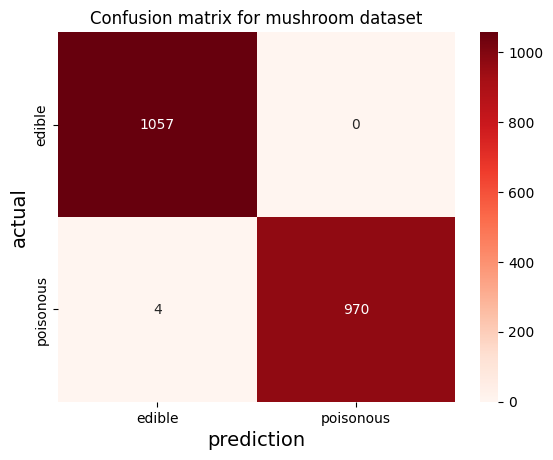

In [37]:
label = ['edible','poisonous']
ax = sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=label, yticklabels=label)
ax.set_title('Confusion matrix for mushroom dataset')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)